### Code for AMSS (2020) Plots



## read in all prawler data in erddap data base and plot as one long timeseries

In [3]:
#standard imports for this operation
from erddapy import ERDDAP
import pandas as pd
import numpy as np
import xarray as xa
import datetime 
from netCDF4 import date2num, num2date
from scipy import interpolate

In [65]:
server_url = 'http://akutan.pmel.noaa.gov:8080/erddap'
dlist = ['erddap_4fd3_fb30_b89f','erddap_17bsitae_prawler','erddap_18bsitaepr2a_prawler','erddap_19bsitaepr2a_prawler']
d = ERDDAP(server=server_url,
           protocol='tabledap',
           response='csv',
          )
df_all = {}

for did in dlist:
    d.dataset_id=did

    #define the variables you want to get
    if (did in ['erddap_4fd3_fb30_b89f','erddap_17bsitae_prawler']):
        d.variables =  [
         'profileid',
         'Temperature',
         'Salinity',
         'Chlorophyll',
         'Turbidity',
         'latitude',
         'longitude',
         'depth',
         "time",
         'Oxy_Conc',
         'Oxy_Sat'
        ]
    else:
        d.variables =  [
         'profile_id',
         'Temperature',
         'Salinity',
         'Chlorophyll',
         'Turbidity',
         'latitude',
         'longitude',
         'depth',
         "time",
         'Oxy_Conc',
         'Oxy_Sat'
        ]

    # useful if only wanting a small time portion
    d.constraints = {
        'time>=': '2016-01-01T00:00:00Z',
        'time<=': '2020-10-10T00:00:00Z',
    }

    df = d.to_pandas(
        index_col='time (UTC)',
        parse_dates=True,
        skiprows=(1,)  # units information can be dropped.
    ).dropna()

    if did in ['erddap_4fd3_fb30_b89f','erddap_17bsitae_prawler']:
        df.sort_values(by='profileid',inplace=True)
    else:
        df.sort_values(by='profile_id',inplace=True)
        
    df.columns = [x[1].split()[0] for x in enumerate(df.columns)]

    df.tail()
    
    df_all.update({did:df})

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

import cmocean


### specify primary bulk figure parameters
fontsize = 24
labelsize = 24
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

Text(0, 0.5, 'Depth (m)')

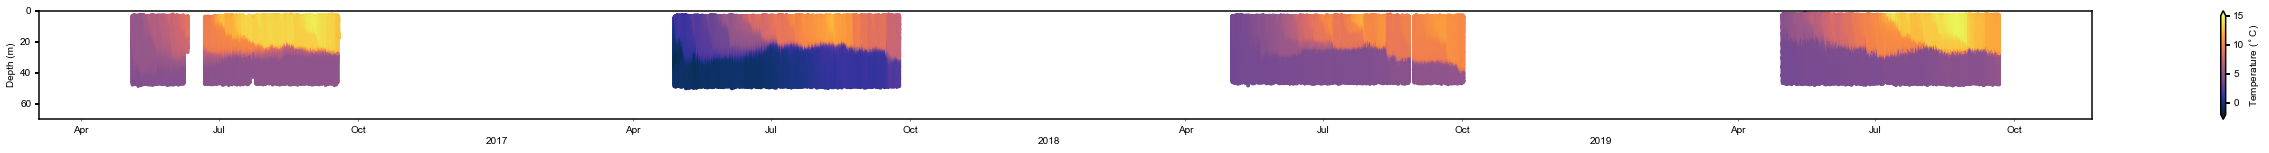

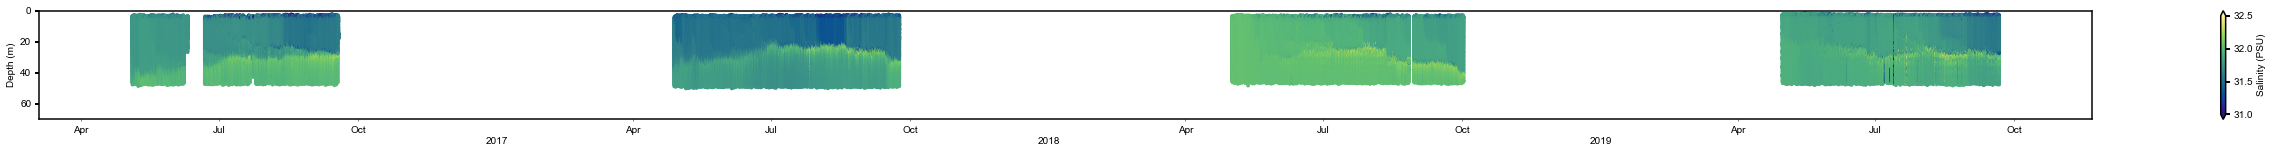

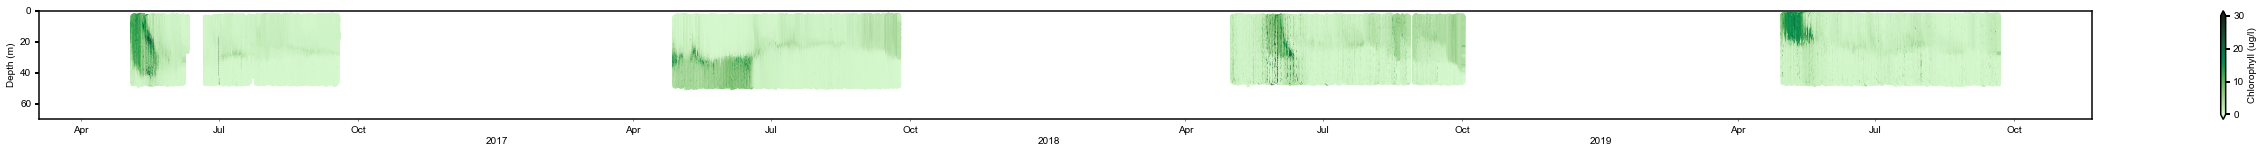

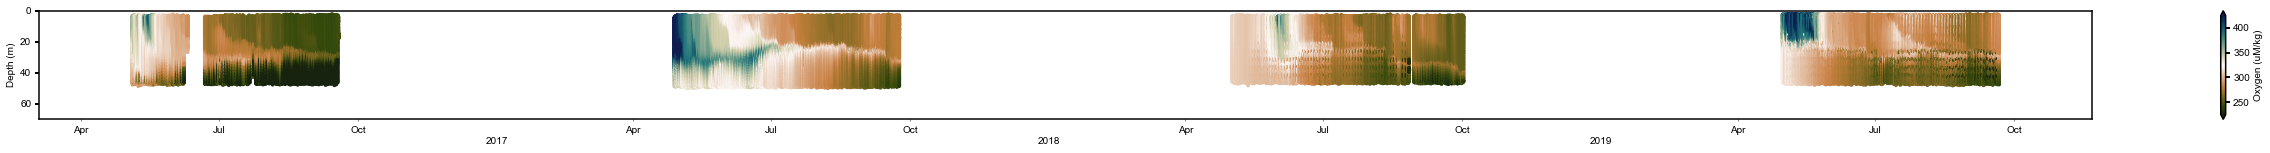

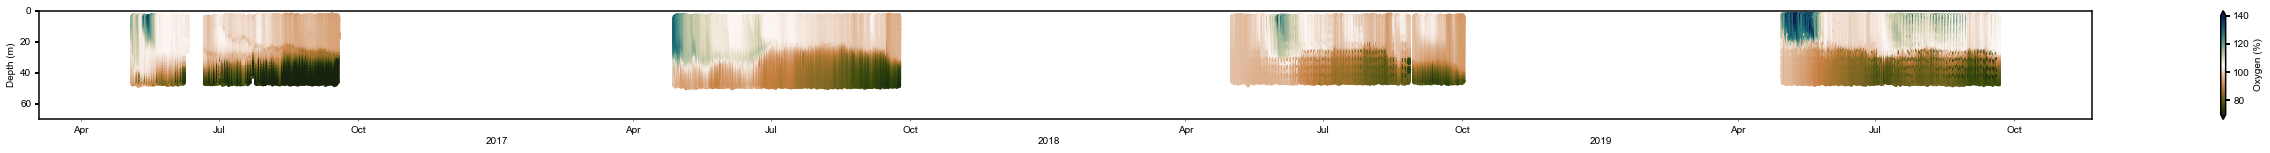

In [68]:
#temp
fig, ax = plt.subplots(figsize=(46, 2))
for df,name in enumerate(df_all):
    df = df_all[name]
    cs = ax.scatter(df.index, df['depth'], s=15, c=df['Temperature'], 
                    vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal)
ax.set_ylim(0, 70)
ax.invert_yaxis()
#ax.set_xlim(start_date, end_date)
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(range(1,12,3),bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_formatter(DateFormatter('\n%Y'))
ax.xaxis.set_tick_params(which='major', pad=7)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)')

#sal
fig, ax = plt.subplots(figsize=(46, 2))
for df,name in enumerate(df_all):
    df = df_all[name]
    cs = ax.scatter(df.index, df['depth'], s=15, c=df['Salinity'], 
                    vmin=31, vmax=32.5, marker='o', edgecolor='none', cmap=cmocean.cm.haline)
ax.set_ylim(0, 70)
ax.invert_yaxis()
#ax.set_xlim(start_date, end_date)
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(range(1,12,3),bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_formatter(DateFormatter('\n%Y'))
ax.xaxis.set_tick_params(which='major', pad=7)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Salinity (PSU)')
ax.set_ylabel('Depth (m)')

#chlor
fig, ax = plt.subplots(figsize=(46, 2))
for df,name in enumerate(df_all):
    df = df_all[name]
    cs = ax.scatter(df.index, df['depth'], s=15, c=df['Chlorophyll'], 
                    vmin=0, vmax=30, marker='o', edgecolor='none', cmap=cmocean.cm.algae)
ax.set_ylim(0, 70)
ax.invert_yaxis()
#ax.set_xlim(start_date, end_date)
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(range(1,12,3),bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_formatter(DateFormatter('\n%Y'))
ax.xaxis.set_tick_params(which='major', pad=7)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Chlorophyll (ug/l)')
ax.set_ylabel('Depth (m)')

#oxy conc
fig, ax = plt.subplots(figsize=(46, 2))
for df,name in enumerate(df_all):
    df = df_all[name]
    cs = ax.scatter(df.index, df['depth'], s=15, c=df['Oxy_Conc'], 
                    vmin=225, vmax=425, marker='o', edgecolor='none', cmap=cmocean.cm.tarn)
ax.set_ylim(0, 70)
ax.invert_yaxis()
#ax.set_xlim(start_date, end_date)
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(range(1,12,3),bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_formatter(DateFormatter('\n%Y'))
ax.xaxis.set_tick_params(which='major', pad=7)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Oxygen (uM/kg)')
ax.set_ylabel('Depth (m)')

#oxy sat
fig, ax = plt.subplots(figsize=(46, 2))
for df,name in enumerate(df_all):
    df = df_all[name]
    cs = ax.scatter(df.index, df['depth'], s=15, c=df['Oxy_Sat'], 
                    vmin=70, vmax=140, marker='o', edgecolor='none', cmap=cmocean.cm.tarn)
ax.set_ylim(0, 70)
ax.invert_yaxis()
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(range(1,12,3),bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_formatter(DateFormatter('\n%Y'))
ax.xaxis.set_tick_params(which='major', pad=7)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Oxygen (%)')
ax.set_ylabel('Depth (m)')

### Load gridded temp data form bs-2c moorings

In [69]:
server_url = 'http://akutan.pmel.noaa.gov:8080/erddap'
dlist = ['1hr_gridded_datasets_Mooring_19bsm2a_final','1hr_gridded_datasets_Mooring_18bsm2a_final','1hr_gridded_datasets_Mooring_17bsm2a_final','1hr_gridded_datasets_Mooring_16bsm2a_final',
         '1hr_gridded_datasets_Mooring_18bs2c_final','1hr_gridded_datasets_Mooring_17bs2c_final','1hr_gridded_datasets_Mooring_16bs2c_final']
d = ERDDAP(server=server_url,
           protocol='griddap',
           response='nc',
          )
df_all = {}

for did in dlist:
    d.dataset_id=did

    df = d.to_xarray()
    
    df_all.update({did:df})

/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/bell/miniconda3/envs/py38/lib/python3.8/site-pa

Text(0, 0.5, 'Depth (m)')

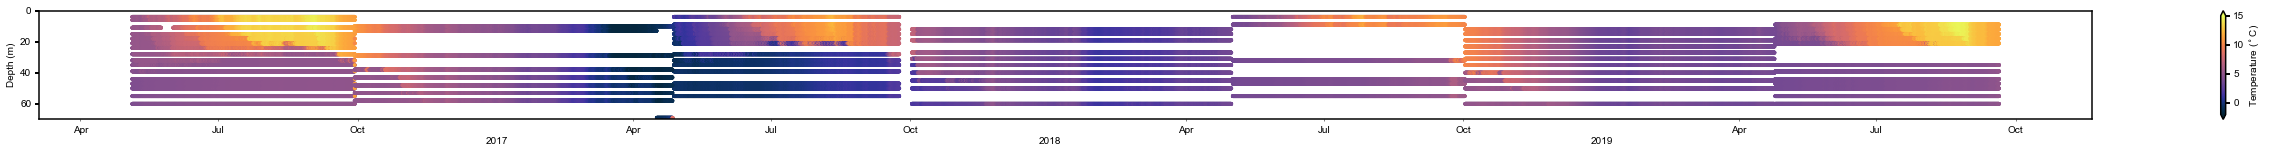

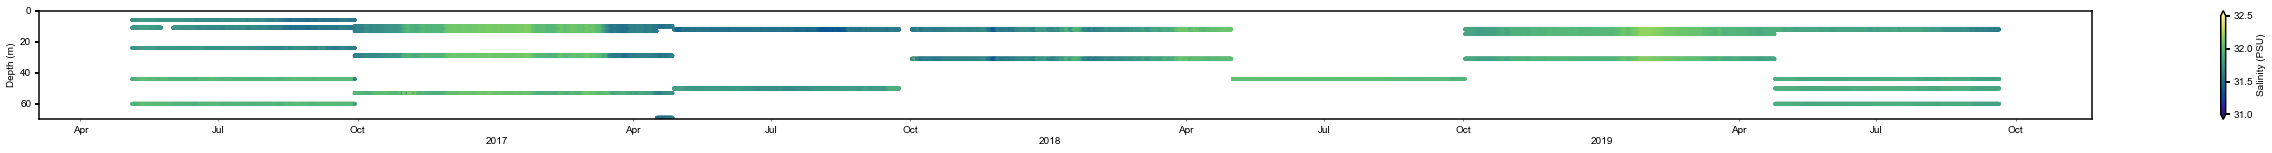

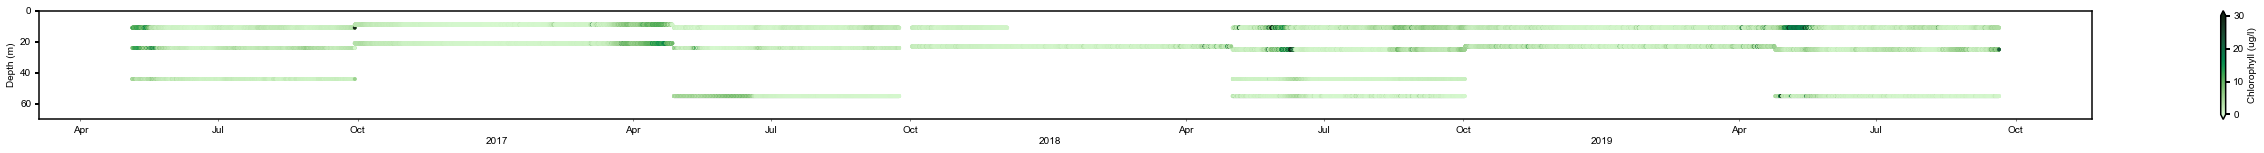

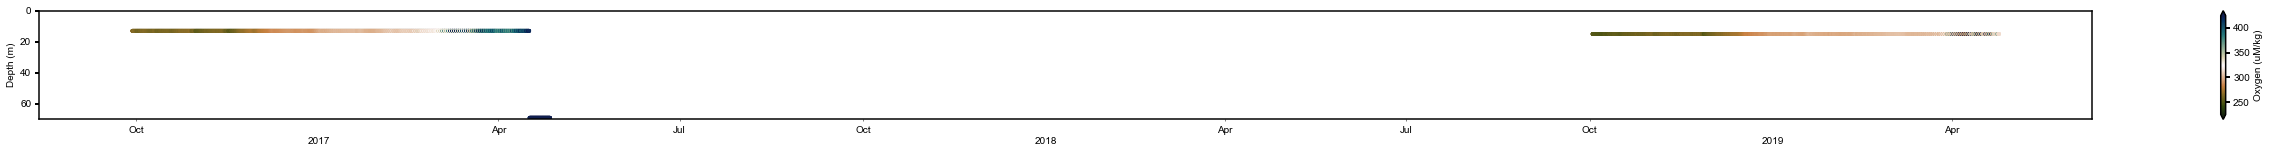

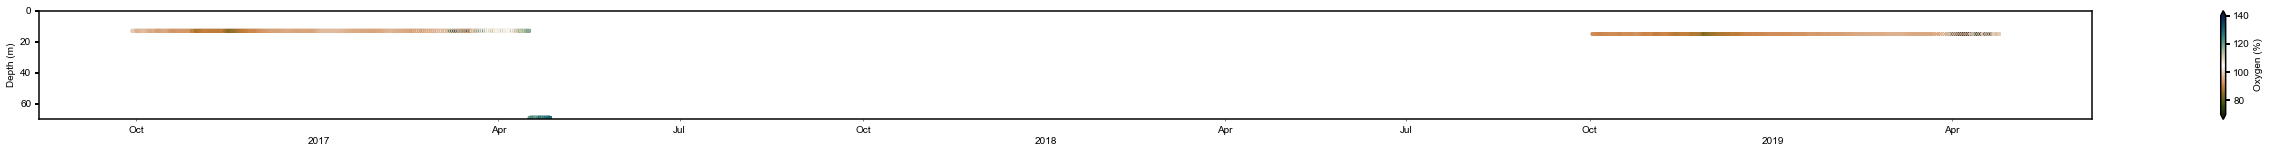

In [70]:
#temp
fig, ax = plt.subplots(figsize=(46, 2))
for df,name in enumerate(df_all):
    df = df_all[name]
    cs = ax.scatter(np.concatenate([[df['time']]*len(df['depth'].values)]), 
                    np.concatenate([[df['depth']]*len(df['time'].values)]).T, 
                    s=15, c=df['temperature'].values, 
                    vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal)
ax.set_ylim(0, 70)
ax.invert_yaxis()
#ax.set_xlim(start_date, end_date)
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(range(1,12,3),bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_formatter(DateFormatter('\n%Y'))
ax.xaxis.set_tick_params(which='major', pad=7)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)')


#sal
fig, ax = plt.subplots(figsize=(46, 2))
for df,name in enumerate(df_all):
    df = df_all[name]
    cs = ax.scatter(np.concatenate([[df['time']]*len(df['depth'].values)]), 
                    np.concatenate([[df['depth']]*len(df['time'].values)]).T, 
                    s=15, c=df['salinity'], 
                    vmin=31, vmax=32.5, marker='o', edgecolor='none', cmap=cmocean.cm.haline)
ax.set_ylim(0, 70)
ax.invert_yaxis()
#ax.set_xlim(start_date, end_date)
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(range(1,12,3),bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_formatter(DateFormatter('\n%Y'))
ax.xaxis.set_tick_params(which='major', pad=7)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Salinity (PSU)')
ax.set_ylabel('Depth (m)')

#chlor
fig, ax = plt.subplots(figsize=(46, 2))
for df,name in enumerate(df_all):
    df = df_all[name]
    cs = ax.scatter(np.concatenate([[df['time']]*len(df['depth'].values)]), 
                    np.concatenate([[df['depth']]*len(df['time'].values)]).T, 
                    s=15, c=df['Chlorophyll_Fluorescence'], 
                    vmin=0, vmax=30, marker='o', edgecolor='none', cmap=cmocean.cm.algae)
ax.set_ylim(0, 70)
ax.invert_yaxis()
#ax.set_xlim(start_date, end_date)
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(range(1,12,3),bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_formatter(DateFormatter('\n%Y'))
ax.xaxis.set_tick_params(which='major', pad=7)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Chlorophyll (ug/l)')
ax.set_ylabel('Depth (m)')

#oxy conc
fig, ax = plt.subplots(figsize=(46, 2))
for df,name in enumerate(df_all):
    df = df_all[name]
    cs = ax.scatter(np.concatenate([[df['time']]*len(df['depth'].values)]), 
                    np.concatenate([[df['depth']]*len(df['time'].values)]).T, 
                    s=15, c=df['Oxygen_Concentration'], 
                    vmin=225, vmax=425, marker='o', edgecolor='none', cmap=cmocean.cm.tarn)
ax.set_ylim(0, 70)
ax.invert_yaxis()
#ax.set_xlim(start_date, end_date)
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(range(1,12,3),bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_formatter(DateFormatter('\n%Y'))
ax.xaxis.set_tick_params(which='major', pad=7)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Oxygen (uM/kg)')
ax.set_ylabel('Depth (m)')

#oxy sat
fig, ax = plt.subplots(figsize=(46, 2))
for df,name in enumerate(df_all):
    df = df_all[name]
    cs = ax.scatter(np.concatenate([[df['time']]*len(df['depth'].values)]), 
                    np.concatenate([[df['depth']]*len(df['time'].values)]).T, 
                    s=15, c=df['Oxygen_Saturation'], 
                    vmin=70, vmax=140, marker='o', edgecolor='none', cmap=cmocean.cm.tarn)
ax.set_ylim(0, 70)
ax.invert_yaxis()
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(range(1,12,3),bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_formatter(DateFormatter('\n%Y'))
ax.xaxis.set_tick_params(which='major', pad=7)
ax.xaxis.set_tick_params(which='minor', pad=5)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Oxygen (%)')
ax.set_ylabel('Depth (m)')

Text(0, 0.5, 'Depth (m)')

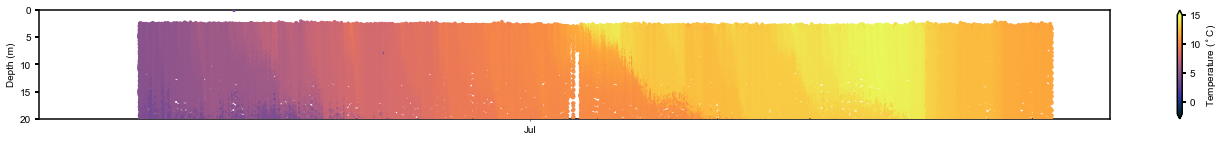

In [244]:
fig, ax = plt.subplots(figsize=(24, 2))

    
for df,name in enumerate(df_all):
    df = df_all[name]
    cs = ax.scatter(df.index, df['depth'], s=15, c=df['Temperature'], 
                    vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal, zorder=3)
"""
#bs2c data
date_time = np.array([date2num(pd.to_datetime(k),'Days since 0001-1-1') for k in xdf_2019m.time.values])
np2d=xdf_2019m.T_20.values[:,:,0,0]
mesh_grid_func = interpolate.interp2d(xdf_2019m.depth,date_time,np2d,kind='linear',bounds_error=False,fill_value=np.nan)
mesh_grid = mesh_grid_func(press_grid,date_time)
mesh_grid[mesh_grid>=1e30]=np.nan
for i,depth in enumerate(press_grid):
    try:
        ax.scatter(date_time,date_time*0 + depth,s=15, c=mesh_grid.T[i],
               vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal)   
    except:
        pass   

date_time = np.array([date2num(pd.to_datetime(k),'Days since 0001-1-1') for k in xdf_2018m.time.values])
np2d=xdf_2018m.T_20.values[:,:,0,0]
mesh_grid_func = interpolate.interp2d(xdf_2018m.depth,date_time,np2d,kind='linear',bounds_error=False,fill_value=np.nan)
mesh_grid = mesh_grid_func(press_grid,date_time)
mesh_grid[mesh_grid>=1e30]=np.nan
for i,depth in enumerate(press_grid):
    try:
        ax.scatter(date_time,date_time*0 + depth,s=15, c=mesh_grid.T[i],
               vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal)   
    except:
        pass


date_time = np.array([date2num(pd.to_datetime(k),'Days since 0001-1-1') for k in xdf_2017m.time.values])
np2d=xdf_2017m.T_20.values[:,:,0,0]
mesh_grid_func = interpolate.interp2d(xdf_2017m.depth,date_time,np2d,kind='linear',bounds_error=False,fill_value=np.nan)
mesh_grid = mesh_grid_func(press_grid,date_time)
mesh_grid[mesh_grid>=1e30]=np.nan
for i,depth in enumerate(press_grid):
    try:
        ax.scatter(date_time,date_time*0 + depth,s=15, c=mesh_grid.T[i],
               vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal)   
    except:
        pass    

date_time = np.array([date2num(pd.to_datetime(k),'Days since 0001-1-1') for k in xdf_2016m.time.values])
np2d=xdf_2016m.T_20.values[:,:,0,0]
mesh_grid_func = interpolate.interp2d(xdf_2016m.depth,date_time,np2d,kind='linear',bounds_error=False,fill_value=np.nan)
mesh_grid = mesh_grid_func(press_grid,date_time)
mesh_grid[mesh_grid>=1e30]=np.nan
for i,depth in enumerate(press_grid):
    ax.scatter(date_time,date_time*0 + depth,s=15, c=mesh_grid.T[i],
           vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal,zorder=3)   
"""
ax.set_ylim(0, 20)
ax.invert_yaxis()
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(range(1,12,3),bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_formatter(DateFormatter('\n%Y'))
ax.xaxis.set_tick_params(which='major', pad=7)
ax.xaxis.set_tick_params(which='minor', pad=5)

ax.set_xlim([datetime.date(2019,4,15).toordinal(),datetime.date(2019,9,30).toordinal()])
cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)')

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in greater_equal
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater_equal


Text(0, 0.5, 'Depth (m)')

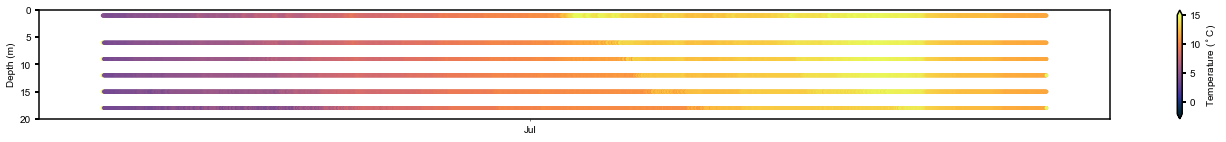

In [245]:
fig, ax = plt.subplots(figsize=(24, 2))

"""    
for df,name in enumerate(df_all):
    df = df_all[name]
    cs = ax.scatter(df.index, df['depth'], s=15, c=df['Temperature'], 
                    vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal, zorder=3)
"""
#bs2c data
date_time = np.array([date2num(pd.to_datetime(k),'Days since 0001-1-1') for k in xdf_2018.time.values])
np2d=xdf_2018.T_20.values[:,:,0,0]
mesh_grid_func = interpolate.interp2d(xdf_2018.depth,date_time,np2d,kind='linear',bounds_error=False,fill_value=np.nan)
mesh_grid = mesh_grid_func(press_grid,date_time)
for i,depth in enumerate(press_grid):
    try:
        ax.scatter(date_time.values,date_time*0 + depth,s=15, c=mesh_grid.T[i],
               vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal)   
    except:
        pass
        
date_time = np.array([date2num(pd.to_datetime(k),'Days since 0001-1-1') for k in xdf_2017.time.values])
np2d=xdf_2017.T_20.values[:,:,0,0]
mesh_grid_func = interpolate.interp2d(xdf_2017.depth,date_time,np2d,kind='linear',bounds_error=False,fill_value=np.nan)
mesh_grid = mesh_grid_func(press_grid,date_time)
for i,depth in enumerate(press_grid):
    try:
        ax.scatter(date_time.values,date_time*0 + depth,s=15, c=mesh_grid.T[i],
               vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal)   
    except:
        pass
    
date_time = np.array([date2num(pd.to_datetime(k),'Days since 0001-1-1') for k in xdf_2016.time.values])
np2d=xdf_2016.T_20.values[:,:,0,0]
mesh_grid_func = interpolate.interp2d(xdf_2016.depth,date_time,np2d,kind='linear',bounds_error=False,fill_value=np.nan)
mesh_grid = mesh_grid_func(press_grid,date_time)
mesh_grid[mesh_grid>=1e30]=np.nan
for i,depth in enumerate(press_grid):
    try:
        ax.scatter(date_time.values,date_time*0 + depth,s=15, c=mesh_grid.T[i],
               vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal,zorder=3)   
    except:
        pass
    
date_time = np.array([date2num(pd.to_datetime(k),'Days since 0001-1-1') for k in xdf_2016_2.time.values])
np2d=xdf_2016_2.T_20.values[:,:,0,0]
mesh_grid_func = interpolate.interp2d(xdf_2016_2.depth,date_time,np2d,kind='linear',bounds_error=False,fill_value=np.nan)
mesh_grid = mesh_grid_func(press_grid,date_time)
mesh_grid[mesh_grid>=1e30]=np.nan
for i,depth in enumerate(press_grid):
    try:
        ax.scatter(date_time.values,date_time*0 + depth,s=15, c=mesh_grid.T[i],
               vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal,zorder=3)   
    except:
        pass
    
#bsm2a data   

for i,depth in enumerate(xdf_2019m.depth.values):
    ax.scatter(xdf_2019m.sel(depth=depth).time.values,(xdf_2019m.sel(depth=depth).T_20 * 0 + depth).values[:,0,0],
               s=15, c=xdf_2019m.sel(depth=depth).T_20.values[:,0,0],vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal)   

for i,depth in enumerate(xdf_2018m.depth.values):
    if depth <= 0:
        continue
    else:
        try:
            ax.scatter(xdf_2018m.sel(depth=depth).time.values,(xdf_2018m.sel(depth=depth).T_20 * 0 + depth).values[:,0,0],
               s=15, c=xdf_2018m.sel(depth=depth).T_20.values[:,0,0],vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal)   
        except:
            pass
        
for i,depth in enumerate(xdf_2017m.depth.values):
    if depth <= 0:
        continue
    else:
        try:
            ax.scatter(xdf_2017m.sel(depth=depth).time.values,(xdf_2017m.sel(depth=depth).T_20 * 0 + depth).values[:,0,0],
                   s=15, c=xdf_2017m.sel(depth=depth).T_20.values[:,0,0],vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal)   
        except:
            pass
for i,depth in enumerate(xdf_2016m.depth.values):

    ax.scatter(xdf_2016m.sel(depth=depth).time.values,(xdf_2016m.sel(depth=depth).T_20 * 0 + depth).values[:,0,0],
           s=15, c=xdf_2016m.sel(depth=depth).T_20.values[:,0,0],vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal)   


ax.set_ylim(0, 20)
ax.invert_yaxis()
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(range(1,12,3),bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_formatter(DateFormatter('\n%Y'))
ax.xaxis.set_tick_params(which='major', pad=7)
ax.xaxis.set_tick_params(which='minor', pad=5)

ax.set_xlim([datetime.date(2019,4,15),datetime.date(2019,9,30)])
cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)')

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in greater_equal


Text(0, 0.5, 'Depth (m)')

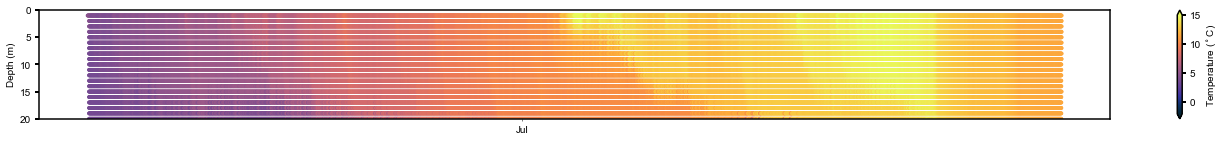

In [250]:
fig, ax = plt.subplots(figsize=(24, 2))


#bs2c data

"""
date_time = np.array([date2num(pd.to_datetime(k),'Days since 0001-1-1') for k in xdf_2018.time.values])
np2d=xdf_2018.T_20.values[:,:,0,0]
mesh_grid_func = interpolate.interp2d(xdf_2018.depth,date_time,np2d,kind='linear',bounds_error=False,fill_value=np.nan)
mesh_grid = mesh_grid_func(press_grid,date_time)
mesh_grid[mesh_grid>=1e30]=np.nan
for i,depth in enumerate(press_grid):
    try:
        ax.scatter(date_time,date_time*0 + depth,s=15, c=mesh_grid.T[i],
               vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal)   
    except:
        pass

date_time = np.array([date2num(pd.to_datetime(k),'Days since 0001-1-1') for k in xdf_2017.time.values])
np2d=xdf_2017.T_20.values[:,:,0,0]
mesh_grid_func = interpolate.interp2d(xdf_2017.depth,date_time,np2d,kind='linear',bounds_error=False,fill_value=np.nan)
mesh_grid = mesh_grid_func(press_grid,date_time)
mesh_grid[mesh_grid>=1e30]=np.nan
for i,depth in enumerate(press_grid):
    try:
        ax.scatter(date_time,date_time*0 + depth,s=15, c=mesh_grid.T[i],
               vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal)   
    except:
        pass    

date_time = np.array([date2num(pd.to_datetime(k),'Days since 0001-1-1') for k in xdf_2016.time.values])
np2d=xdf_2016.T_20.values[:,:,0,0]
mesh_grid_func = interpolate.interp2d(xdf_2016.depth,date_time,np2d,kind='linear',bounds_error=False,fill_value=np.nan)
mesh_grid = mesh_grid_func(press_grid,date_time)
mesh_grid[mesh_grid>=1e30]=np.nan
for i,depth in enumerate(press_grid):
    try:
        ax.scatter(date_time,date_time*0 + depth,s=15, c=mesh_grid.T[i],
               vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal)   
    except:
        pass       

"""

#bsm2a
date_time = np.array([date2num(pd.to_datetime(k),'Days since 0001-1-1') for k in xdf_2019m.time.values])
np2d=xdf_2019m.T_20.values[:,:,0,0]
mesh_grid_func = interpolate.interp2d(xdf_2019m.depth,date_time,np2d,kind='linear',bounds_error=False,fill_value=np.nan)
mesh_grid = mesh_grid_func(press_grid,date_time)
mesh_grid[mesh_grid>=1e30]=np.nan
for i,depth in enumerate(press_grid):
    try:
        ax.scatter(date_time,date_time*0 + depth,s=15, c=mesh_grid.T[i],
               vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal)   
    except:
        pass   
"""
date_time = np.array([date2num(pd.to_datetime(k),'Days since 0001-1-1') for k in xdf_2018m.time.values])
np2d=xdf_2018m.T_20.values[:,:,0,0]
mesh_grid_func = interpolate.interp2d(xdf_2018m.depth,date_time,np2d,kind='linear',bounds_error=False,fill_value=np.nan)
mesh_grid = mesh_grid_func(press_grid,date_time)
mesh_grid[mesh_grid>=1e30]=np.nan
for i,depth in enumerate(press_grid):
    try:
        ax.scatter(date_time,date_time*0 + depth,s=15, c=mesh_grid.T[i],
               vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal)   
    except:
        pass


date_time = np.array([date2num(pd.to_datetime(k),'Days since 0001-1-1') for k in xdf_2017m.time.values])
np2d=xdf_2017m.T_20.values[:,:,0,0]
mesh_grid_func = interpolate.interp2d(xdf_2017m.depth,date_time,np2d,kind='linear',bounds_error=False,fill_value=np.nan)
mesh_grid = mesh_grid_func(press_grid,date_time)
mesh_grid[mesh_grid>=1e30]=np.nan
for i,depth in enumerate(press_grid):
    try:
        ax.scatter(date_time,date_time*0 + depth,s=15, c=mesh_grid.T[i],
               vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal)   
    except:
        pass    

date_time = np.array([date2num(pd.to_datetime(k),'Days since 0001-1-1') for k in xdf_2016m.time.values])
np2d=xdf_2016m.T_20.values[:,:,0,0]
mesh_grid_func = interpolate.interp2d(xdf_2016m.depth,date_time,np2d,kind='linear',bounds_error=False,fill_value=np.nan)
mesh_grid = mesh_grid_func(press_grid,date_time)
mesh_grid[mesh_grid>=1e30]=np.nan
for i,depth in enumerate(press_grid):
    try:
        ax.scatter(date_time,date_time*0 + depth,s=15, c=mesh_grid.T[i],
               vmin=-2, vmax=15, marker='o', edgecolor='none', cmap=cmocean.cm.thermal)   
    except:
        pass    """

ax.set_ylim(0, 20)
ax.invert_yaxis()
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(range(1,12,3),bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_formatter(DateFormatter('\n%Y'))
ax.xaxis.set_tick_params(which='major', pad=7)
ax.xaxis.set_tick_params(which='minor', pad=5)

#ax.set_xlim([datetime.date(2019,4,15),datetime.date(2019,9,30)])
cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)')

In [43]:
fig.savefig('temp_all.png')
fig.savefig('temp_all.svg')

In [118]:
xdf_2019m = xa.load_dataset(sfile_2019m)
xdf_2019m = xdf_2019m.where(xdf_2019m != 1e35, np.nan)
xdf_2018 = xa.load_dataset(sfile_2018)
xdf_2018 = xdf_2018.where(xdf_2018 != 1e35, np.nan)
xdf_2018m = xa.load_dataset(sfile_2018m)
xdf_2018m = xdf_2018m.where(xdf_2018m != 1e35, np.nan)
xdf_2017 = xa.load_dataset(sfile_2017)
xdf_2017 = xdf_2017.where(xdf_2017 != 1e35, np.nan)
xdf_2017m = xa.load_dataset(sfile_2017m)
xdf_2017m = xdf_2017m.where(xdf_2017m != 1e35, np.nan)
xdf_2016 = xa.load_dataset(sfile_2016)
xdf_2016 = xdf_2016.where(xdf_2016 != 1e35, np.nan)
xdf_2016m = xa.load_dataset(sfile_2016m)
xdf_2016m = xdf_2016m.where(xdf_2016m != 1e35, np.nan)


Text(0, 0.5, 'Depth (m)')

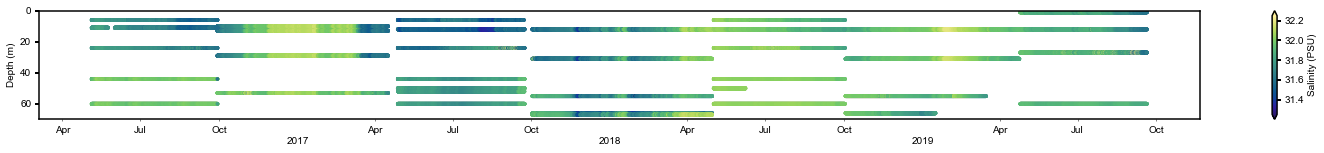

In [121]:
#check unqc'd stuff too
fig, ax = plt.subplots(figsize=(26, 2))

vmax=32.25
vmin=31.25

"""for df,name in enumerate(df_all):
    df = df_all[name]
    cs = ax.scatter(df.index, df['depth'], s=15, c=df['Salinity'], 
                    vmin=vmin, vmax=vmax, marker='o', edgecolor='none', cmap=cmocean.cm.haline)
    """
#bs2c
for i,depth in enumerate(xdf_2018.depth.values):
    # bad data in 66m after january, bad after march? for 55m
    try:
        if not (np.isnan(xdf_2018.sel(depth=depth).S_41.values[:,0,0]).all()):

            if depth == 55:
                ax.scatter(xdf_2018.sel(time=slice('2018-10-01','2019-03-15'),depth=depth).time.values,(xdf_2018.sel(time=slice('2018-10-01','2019-03-15'),depth=depth).S_41 * 0 + depth).values[:,0,0],
                       s=15, c=xdf_2018.sel(time=slice('2018-10-01','2019-03-15'),depth=depth).S_41.values[:,0,0],vmin=vmin, vmax=vmax, marker='o', edgecolor='none', cmap=cmocean.cm.haline)   
            elif depth == 66:
                ax.scatter(xdf_2018.sel(time=slice('2018-10-01','2019-01-15'),depth=depth).time.values,(xdf_2018.sel(time=slice('2018-10-01','2019-01-15'),depth=depth).S_41 * 0 + depth).values[:,0,0],
                       s=15, c=xdf_2018.sel(time=slice('2018-10-01','2019-01-15'),depth=depth).S_41.values[:,0,0],vmin=vmin, vmax=vmax, marker='o', edgecolor='none', cmap=cmocean.cm.haline)   
            else:
                ax.scatter(xdf_2018.sel(depth=depth).time.values,(xdf_2018.sel(depth=depth).S_41 * 0 + depth).values[:,0,0],
                       s=15, c=xdf_2018.sel(depth=depth).S_41.values[:,0,0],vmin=vmin, vmax=vmax, marker='o', edgecolor='none', cmap=cmocean.cm.haline)   
    except:
        pass 
for i,depth in enumerate(xdf_2017.depth.values):
    try:
        if not (np.isnan(xdf_2017.sel(depth=depth).S_41.values[:,0,0]).all()):
            ax.scatter(xdf_2017.sel(depth=depth).time.values,(xdf_2017.sel(depth=depth).S_41 * 0 + depth).values[:,0,0],
               s=15, c=xdf_2017.sel(depth=depth).S_41.values[:,0,0],vmin=vmin, vmax=vmax, marker='o', edgecolor='none', cmap=cmocean.cm.haline)   
    except:
        pass 
for i,depth in enumerate(xdf_2016.depth.values):
    try:
        if not (np.isnan(xdf_2016.sel(depth=depth).S_41.values[:,0,0]).all()):
            ax.scatter(xdf_2016.sel(depth=depth).time.values,(xdf_2016.sel(depth=depth).S_41 * 0 + depth).values[:,0,0],
               s=15, c=xdf_2016.sel(depth=depth).S_41.values[:,0,0],vmin=vmin, vmax=vmax, marker='o', edgecolor='none', cmap=cmocean.cm.haline)   
    except:
        pass 
#bsm2a
for i,depth in enumerate(xdf_2019m.depth.values):
    try:
        ax.scatter(xdf_2019m.sel(depth=depth).time.values,(xdf_2019m.sel(depth=depth).S_41 * 0 + depth).values[:,0,0],
               s=15, c=xdf_2019m.sel(depth=depth).S_41.values[:,0,0],vmin=vmin, vmax=vmax, marker='o', edgecolor='none', cmap=cmocean.cm.haline)   
    except:
        pass 
for i,depth in enumerate(xdf_2018m.depth.values):
    try:
        ax.scatter(xdf_2018m.sel(depth=depth).time.values,(xdf_2018m.sel(depth=depth).S_41 * 0 + depth).values[:,0,0],
               s=15, c=xdf_2018m.sel(depth=depth).S_41.values[:,0,0],vmin=vmin, vmax=vmax, marker='o', edgecolor='none', cmap=cmocean.cm.haline)   
    except:
        pass 
for i,depth in enumerate(xdf_2017m.depth.values):
    try:
        ax.scatter(xdf_2017m.sel(depth=depth).time.values,(xdf_2017m.sel(depth=depth).S_41 * 0 + depth).values[:,0,0],
               s=15, c=xdf_2017m.sel(depth=depth).S_41.values[:,0,0],vmin=vmin, vmax=vmax, marker='o', edgecolor='none', cmap=cmocean.cm.haline)   
    except:
        pass 
for i,depth in enumerate(xdf_2016m.depth.values):
    try:
        ax.scatter(xdf_2016m.sel(depth=depth).time.values,(xdf_2016m.sel(depth=depth).S_41 * 0 + depth).values[:,0,0],
               s=15, c=xdf_2016m.sel(depth=depth).S_41.values[:,0,0],vmin=vmin, vmax=vmax, marker='o', edgecolor='none', cmap=cmocean.cm.haline)   
    except:
        pass 
    
ax.set_ylim(0, 70)
ax.invert_yaxis()
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(range(1,12,3),bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_formatter(DateFormatter('\n%Y'))
ax.xaxis.set_tick_params(which='major', pad=7)
ax.xaxis.set_tick_params(which='minor', pad=5)

#ax.set_xlim(['2016-4-15','2019-9-30'])
cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Salinity (PSU)')
ax.set_ylabel('Depth (m)')

In [46]:
fig.savefig('sal_all.png')
fig.savefig('sal_all.svg')

### Use erddap for non prawler mooring data

In [172]:
server_url = 'http://downdraft.pmel.noaa.gov:8080/erddap'
dlist = ['datasets_Mooring_18bs2c_final','datasets_Mooring_17bs2c_final','datasets_Mooring_16bs2c_final',
         'datasets_Mooring_19bsm2a_final','datasets_Mooring_18bsm2a_final','datasets_Mooring_17bsm2a_final','datasets_Mooring_16bsm2a_final',
        'datasets_Mooring_19bsitaepr2a_final']
d = ERDDAP(server=server_url,
           protocol='tabledap',
           response='csv',
          )
df_all_m = {}


for did in dlist:

    #usally two data bases exist for each deployment, a preliminary and a final
    d.dataset_id=did

    #define the variables you want to get
    variables = d.get_var_by_attr(
        dataset_id=did,
        standard_name=lambda v: v is not None
    )

    d.variables = variables
    # useful if only wanting a small time portion
    d.constraints = {
            'time>=': '2015-01-01T00:00:00Z',
            'time<=': '2020-10-10T00:00:00Z',
    }

    #data download below will fail unitl the variables are named apporpiatly

    df = d.to_pandas(
        index_col='time (UTC)',
        parse_dates=True,
        skiprows=(1,)  # units information can be dropped.
    )

    df.sort_index(inplace=True)
    df.columns = [x[1].split()[0] for x in enumerate(df.columns)]
    
    for column in df.columns:
        df[column][df[column] > 1e34] = np.nan
    
    df_all_m.update({did:df})

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0, 0.5, 'Depth (m)')

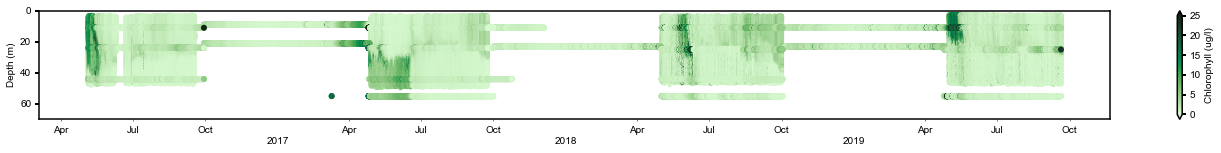

In [137]:
fig, ax = plt.subplots(figsize=(24, 2))

vmax=25
vmin=0

for df,name in enumerate(df_all):
    df = df_all[name]
    cs = ax.scatter(df.index, df['depth'], s=15, c=df['Chlorophyll'], 
                    vmin=vmin, vmax=vmax, marker='o', edgecolor='none', cmap=cmocean.cm.algae)

for df,name in enumerate(df_all_m):
    df = df_all_m[name]
    for name,group in df.groupby(df.depth):
        if not (np.isnan(group['Chlorophyll_Fluorescence']).all()):

            ax.scatter(group.index,group.depth,c=group['Chlorophyll_Fluorescence'],
              vmin=vmin, vmax=vmax, marker='o', edgecolor='none', 
               cmap=cmocean.cm.algae)

        
ax.set_ylim(0, 70)
ax.invert_yaxis()
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(range(1,12,3),bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_formatter(DateFormatter('\n%Y'))
ax.xaxis.set_tick_params(which='major', pad=7)
ax.xaxis.set_tick_params(which='minor', pad=5)

#ax.set_xlim(['2016-4-15','2019-9-30'])
cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Chlorophyll (ug/l)')
ax.set_ylabel('Depth (m)')  

In [62]:
fig.savefig('chlor_all.png')
fig.savefig('chlor_all.svg')

datasets_Mooring_18bs2c_final
datasets_Mooring_17bs2c_final
datasets_Mooring_16bs2c_final
datasets_Mooring_19bsm2a_final
datasets_Mooring_18bsm2a_final
datasets_Mooring_17bsm2a_final
datasets_Mooring_16bsm2a_final
datasets_Mooring_19bsitaepr2a_final


Text(0, 0.5, 'Depth (m)')

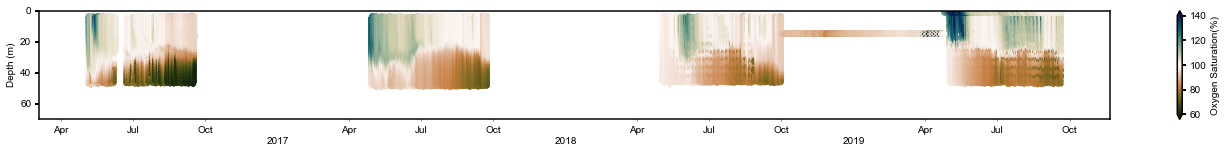

In [173]:
fig, ax = plt.subplots(figsize=(24, 2))

vmax=140
vmin=60

for df,name in enumerate(df_all):
    df = df_all[name]
    cs = ax.scatter(df.index, df['depth'], s=15, c=df['Oxy_Sat'], 
                    vmin=vmin, vmax=vmax, marker='o', edgecolor='none', cmap=cmocean.cm.tarn)

for df,name in enumerate(df_all_m):
    print(name)
    df = df_all_m[name]
    for name,group in df.groupby(df.depth):
        try:
            if not (np.isnan(group['Oxygen_Saturation']).all()):
                ax.scatter(group.index,group.depth,c=group['Oxygen_Saturation'],
                  vmin=vmin, vmax=vmax, marker='o', edgecolor='none', 
                   cmap=cmocean.cm.tarn)
        except:
            pass

    
ax.set_ylim(0, 70)
ax.invert_yaxis()
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(range(1,12,3),bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_formatter(DateFormatter('\n%Y'))
ax.xaxis.set_tick_params(which='major', pad=7)
ax.xaxis.set_tick_params(which='minor', pad=5)

#ax.set_xlim(['2016-4-15','2019-9-30'])
cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Oxygen Saturation(%)')
ax.set_ylabel('Depth (m)')  

In [54]:
fig.savefig('oxy.png',dpi=600)
fig.savefig('oxy.svg')

datasets_Mooring_18bs2c_final
datasets_Mooring_17bs2c_final
datasets_Mooring_16bs2c_final
datasets_Mooring_19bsm2a_final
datasets_Mooring_18bsm2a_final
datasets_Mooring_17bsm2a_final
datasets_Mooring_16bsm2a_final
datasets_Mooring_19bsitaepr2a_final


Text(0, 0.5, 'Depth (m)')

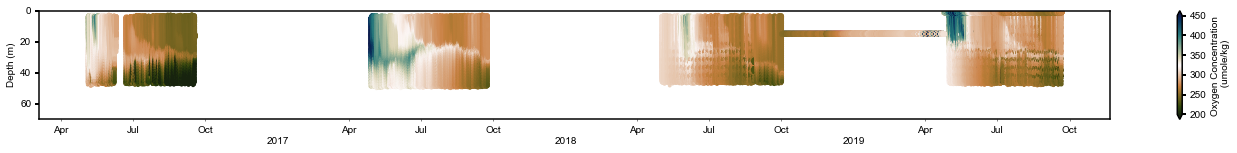

In [177]:
fig, ax = plt.subplots(figsize=(24, 2))

vmax=450
vmin=200

for df,name in enumerate(df_all):
    df = df_all[name]
    cs = ax.scatter(df.index, df['depth'], s=15, c=df['Oxy_Conc'], 
                    vmin=vmin, vmax=vmax, marker='o', edgecolor='none', cmap=cmocean.cm.tarn)
for df,name in enumerate(df_all_m):
    print(name)
    df = df_all_m[name]
    for name,group in df.groupby(df.depth):
        try:
            if not (np.isnan(group['Oxygen_Concentration']).all()):
                ax.scatter(group.index,group.depth,c=group['Oxygen_Concentration'],
                  vmin=vmin, vmax=vmax, marker='o', edgecolor='none', 
                   cmap=cmocean.cm.tarn)
        except:
            pass

    
ax.set_ylim(0, 70)
ax.invert_yaxis()
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(range(1,12,3),bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_formatter(DateFormatter('\n%Y'))
ax.xaxis.set_tick_params(which='major', pad=7)
ax.xaxis.set_tick_params(which='minor', pad=5)

#ax.set_xlim(['2016-4-15','2019-9-30'])
cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Oxygen Concentration \n (umole/kg)')
ax.set_ylabel('Depth (m)')  

### met data (daily mean)

In [215]:
wdf_2016 = pd.read_csv('/Users/bell/scratch/16bsm2a_wpak.csv',skiprows=[1,2],
                 parse_dates=True,index_col='time')
wdf_2017 = pd.read_csv('/Users/bell/scratch/17bsm2a_wpak.csv',skiprows=[1,2],
                 parse_dates=True,index_col='time')
wdf_2018 = pd.read_csv('/Users/bell/scratch/18bsm2a_wpak.csv',skiprows=[1,2],
                 parse_dates=True,index_col='time')

wdf_2016 = wdf_2016.resample('24H').median()
wdf_2017 = wdf_2017.resample('24H').mean()
wdf_2018 = wdf_2018.resample('24H').mean()

wdf_2016.columns = [x[1].split()[0] for x in enumerate(wdf_2016.columns)]
wdf_2017.columns = [x[1].split()[0] for x in enumerate(wdf_2017.columns)]
wdf_2018.columns = [x[1].split()[0] for x in enumerate(wdf_2018.columns)]

In [218]:
met_data_list = ['erddap_19bsitaepr2a_met','erddap_18bsitaepr2a_met']

In [219]:
df = pd.read_csv(d.get_search_url(response='csv', search_for='bsitaepr2a_met'))

constraints = {
    'time>=': '2017-04-25T00:00:00Z',
    'time<=': str(datetime.datetime.today()),
}

variables = [
#'wind_from_direction', 
 'air_temperature',
 'relative_humidity',
 'northward_wind', 
 'eastward_wind', 
# 'wind_speed', 
 'latitude',
 'longitude',
 'time'
]

variable_dic={}

for index,row in df.iterrows():
    info_url = d.get_info_url(dataset_id=row['Dataset ID'], response='csv')
    info = pd.read_csv(info_url)

    #print(info.head())
    print('Variables in {}:'.format(row['Dataset ID']))
    print(','.join(info.loc[info['Row Type'] == 'variable', 'Variable Name']))

    variable_dic.update({row['Dataset ID']:list(info.loc[info['Row Type'] == 'variable', 'Variable Name'])})
    

from requests.exceptions import HTTPError

dfs = {}
for index,row in df.iterrows():
    if row['Dataset ID'] in met_data_list:
        print(row['Dataset ID'])
        try:
            e = ERDDAP(server=server_url,
                protocol='tabledap',
                response='csv',
            )
            e.dataset_id=row['Dataset ID']
            e.constraints=constraints
            if row['Dataset ID'] in met_data_list:
                e.variables=variables + ['air_pressure']
        except HTTPError:
            print('Failed to generate url {}'.format(row['Dataset ID']))
            continue
        
        df = e.to_pandas(
                    index_col='time (UTC)',
                    parse_dates=True,
                    skiprows=(1,)  # units information can be dropped.
                    )
        df.columns = [x[1].split()[0] for x in enumerate(df.columns)]   
        dfs.update({row['Dataset ID']: df})


Variables in erddap_18bsitaepr2a_met:
timeseries_id,time,wind_speed,northward_wind,latitude,longitude,air_pressure,relative_humidity,air_temperature,wind_from_direction,eastward_wind
Variables in erddap_19bsitaepr2a_met:
timeseries_id,latitude,longitude,time,northward_wind,air_pressure,relative_humidity,air_temperature,eastward_wind
erddap_18bsitaepr2a_met
erddap_19bsitaepr2a_met


In [220]:
#calculate dewpoint temp
def RHtoTD(RH,Tc):
    """
    Notes
    -----
        Uses:     Es=6.11*10.0**(7.5*Tc/(237.7+Tc))
                  E=(RH*Es)/100
                  Tdc=(-430.22+237.7*np.log(E))/(-1.0*np.log(E)+19.08)
    
    Examples
    --------
    TODO
    
    References
    ----------
    TODO
    
    Modifications
    -------------
    """
    
    Es=6.11*10.0**(7.5*Tc/(237.7+Tc))

    E=(RH*Es)/100

    Tdc=(-430.22+237.7*np.log(E))/(-1.0*np.log(E)+19.08)
    return (Tdc)

In [221]:
#calculate windspeed and direction
for ds, df in dfs.items():
    df['wind_speed']=np.sqrt(df['northward_wind']**2 + df['eastward_wind']**2)
    df['wind_from_direction'] = 270-np.rad2deg(np.arctan2(df['northward_wind'],df['eastward_wind']))

    df['wind_from_direction'][df['wind_from_direction']>360] = df['wind_from_direction'][df['wind_from_direction']>360]-360

#eliminate unlikely wind and pressure extremes
for ds, df in dfs.items():
    df['wind_speed'][df['wind_speed']>100] = np.nan
    df['eastward_wind'][df['eastward_wind']>75] = np.nan
    df['northward_wind'][df['northward_wind']>75] = np.nan
    df['air_pressure'][df['air_pressure']<940] = np.nan
    df['air_temperature'][df['air_temperature']>50] = np.nan
    df['relative_humidity'][df['relative_humidity']<25] = np.nan

    df['td'] = RHtoTD(df['relative_humidity'],df['air_temperature'])
      
for ds, df in dfs.items():
    dfs[ds] = df.resample('24H').mean()
    
#Arbitrary QC points based on evaluating plot / local characteristics and not broad science boundaries
wdf_2016.WS_401[wdf_2016.WS_401>25] = np.nan
wdf_2016.RH_910[wdf_2016.RH_910<25] = np.nan
wdf_2016.BP_915[wdf_2016.BP_915<975] = np.nan
wdf_2016.AT_21[wdf_2016.AT_21>975] = np.nan
wdf_2016['TD'] = RHtoTD(wdf_2016.RH_910,wdf_2016.AT_21)
wdf_2017.WS_401[wdf_2017.WS_401>25] = np.nan
wdf_2017.RH_910[wdf_2017.RH_910<25] = np.nan
wdf_2017.BP_915[wdf_2017.BP_915<975] = np.nan
wdf_2017.AT_21[wdf_2017.AT_21>975] = np.nan
wdf_2017['TD'] = RHtoTD(wdf_2017.RH_910,wdf_2017.AT_21)
wdf_2018.WS_401[wdf_2018.WS_401>25] = np.nan
wdf_2018.RH_910[wdf_2018.RH_910<25] = np.nan
wdf_2018.BP_915[wdf_2018.BP_915<975] = np.nan
wdf_2018.AT_21[wdf_2018.AT_21>975] = np.nan
wdf_2018['TD'] = RHtoTD(wdf_2018.RH_910,wdf_2018.AT_21)

NameError: name 'wdf_2016' is not defined

ConversionError: Failed to convert value(s) to axis units: '2016-4-15'

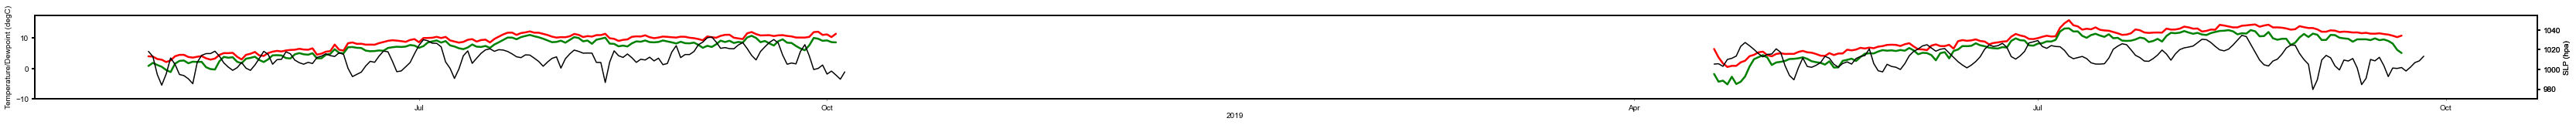

In [224]:
fig, ax = plt.subplots(figsize=(58, 2))

for ds, df in dfs.items():
    #ax.plot(wdf_2016.index,wdf_2016['AT_21'],'red',linewidth=2.5)
    #ax.plot(wdf_2017.index,wdf_2017['AT_21'],'red',linewidth=2.5)
    ax.plot(df.index,df['air_temperature'],'red',linewidth=2.5)
    ax.set_ylabel('Temperature/Dewpoint (degC)')

    #ax.plot(wdf_2016.index,wdf_2016['TD'],'green',linewidth=2.5)
    #ax.plot(wdf_2017.index,wdf_2017['TD'],'green',linewidth=2.5)
    ax.plot(df.index,df['td'],'green',linewidth=2.5)    
    ax.set_ylim([-10,17.5])

    ax2 = ax.twinx()
    #ax2.plot(wdf_2016.index,wdf_2016['BP_915'],'black',linewidth=1.5)
    #ax2.plot(wdf_2017.index,wdf_2017['BP_915'],'black',linewidth=1.5)
    ax2.plot(df.index,df['air_pressure'],'black',linewidth=1.5) 
    ax2.set_ylabel('SLP (hpa)')
    ax2.set_ylim([970,1055])

#plt.legend(['Peggy (2010-2017)','Prawler (2018)','Prawler (2019)'])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(range(1,12,3),bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_formatter(DateFormatter('\n%Y'))
ax.xaxis.set_tick_params(which='major', pad=7)
ax.xaxis.set_tick_params(which='minor', pad=5)

ax.set_xlim(['2016-4-15','2019-9-30'])    
fig.savefig('wx_atrh.png')
fig.savefig('wx_atrh.svg')


fig, ax = plt.subplots(figsize=(46, 2))

for ds, df in dfs.items():
    #ax.plot(wdf_2016.index,wdf_2016['WS_401'],'black',linewidth=1.5)
    #ax.plot(wdf_2017.index,wdf_2017['WS_401'],'black',linewidth=1.5)
    #ax.plot(wdf_2018.index,wdf_2018['WS_401'],'black',linewidth=1.5)
    if not '_18' in ds: #bad wind direction at prawler in 2018
        print(ds)
        ax.plot(df.index,df['wind_speed'],'black',linewidth=1.5) 
    ax.set_ylabel('Wind Speed (m/s)')
    ax.set_ylim([0,15])
    
    ax2 = ax.twinx()
    #ax2.plot(wdf_2016.index,wdf_2016['WD_410'],'b+')
    #ax2.plot(wdf_2017.index,wdf_2017['WD_410'],'b+')
    #ax2.plot(wdf_2018.index,wdf_2018['WD_410'],'b+')
    if not '_18' in ds: #bad wind direction at prawler in 2018
        ax2.plot(df.index,df['wind_from_direction'],'b+') 
    ax2.set_ylabel('WD degrees')
    ax2.set_ylim([0,360])
    
#plt.legend(['Peggy (2010-2017)','Prawler (2018)','Prawler (2019)'])
xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator(range(1,12,3),bymonthday=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_formatter(DateFormatter('\n%Y'))
ax.xaxis.set_tick_params(which='major', pad=7)
ax.xaxis.set_tick_params(which='minor', pad=5)

ax.set_xlim(['2016-4-15','2019-9-30'])
fig.savefig('wx_wind.png')

## Todo:
*grid temp data   
*pull all oxygen at depths (summer)   
*make sure to get all instruments available   
*compare deep o2 with prawler   

(737164.0, 737332.0)

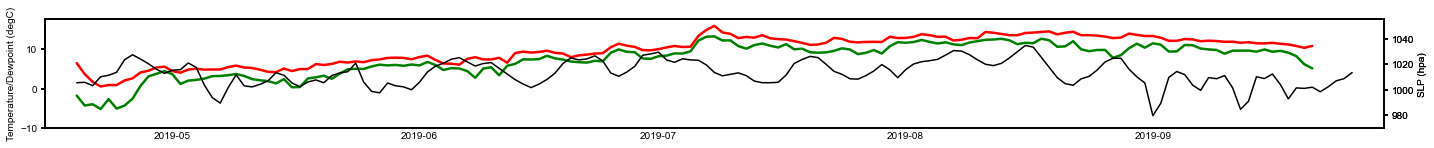

In [230]:
fig, ax = plt.subplots(figsize=(24, 2))

for ds, df in dfs.items():
    #ax.plot(wdf_2016.index,wdf_2016['AT_21'],'red',linewidth=2.5)
    #ax.plot(wdf_2017.index,wdf_2017['AT_21'],'red',linewidth=2.5)
    ax.plot(df.index,df['air_temperature'],'red',linewidth=2.5)
    ax.set_ylabel('Temperature/Dewpoint (degC)')

    #ax.plot(wdf_2016.index,wdf_2016['TD'],'green',linewidth=2.5)
    #ax.plot(wdf_2017.index,wdf_2017['TD'],'green',linewidth=2.5)
    ax.plot(df.index,df['td'],'green',linewidth=2.5)    
    ax.set_ylim([-10,17.5])

    ax2 = ax.twinx()
    #ax2.plot(wdf_2016.index,wdf_2016['BP_915'],'black',linewidth=1.5)
    #ax2.plot(wdf_2017.index,wdf_2017['BP_915'],'black',linewidth=1.5)
    ax2.plot(df.index,df['air_pressure'],'black',linewidth=1.5) 
    ax2.set_ylabel('SLP (hpa)')
    ax2.set_ylim([970,1055])
ax.set_xlim([datetime.datetime(2019,4,15),datetime.datetime(2019,9,30)])
